## Read Data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

agent_a = r'D:\Users\91584\PycharmProjects\uitb-headsup-computing\hrl\envs\supervisory_control\results\08-13_08-32\agent_a_supervisory_control_results.csv'
agent_b = r'D:\Users\91584\PycharmProjects\uitb-headsup-computing\hrl\envs\supervisory_control\results\08-13_15-39\agent_b_supervisory_control_results.csv'
# agent_c = r'D:\Users\91584\PycharmProjects\uitb-headsup-computing\hrl\envs\supervisory_control\results\08-14_09-03\agent_c_supervisory_control_results.csv'
agent_c = r'D:\Users\91584\PycharmProjects\uitb-headsup-computing\hrl\envs\supervisory_control\results\08-15_09-31\agent_c_supervisory_control_results.csv'

# 1. Reading the CSV files
df_a = pd.read_csv(agent_a)
df_b = pd.read_csv(agent_b)
df_c = pd.read_csv(agent_c)

# 2. Combining the Data
combined_df = pd.concat([df_a, df_b, df_c], ignore_index=True)

def extract_data_for_agent(df, col_name, event_levels):
    data = []
    for level in event_levels:
        subset = df[df['event_update_level'] == level][col_name].tolist()
        data.append(subset)
    return data

## Number of Attention Switches

In [2]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Extract unique event levels from the combined dataframe
# event_levels = combined_df['event_update_level'].unique()

# # Extract the data for each agent
# data_a = extract_data_for_agent(df_a, 'num_attention_switches', event_levels)
# data_b = extract_data_for_agent(df_b, 'num_attention_switches', event_levels)
# data_c = extract_data_for_agent(df_c, 'num_attention_switches', event_levels)

# # Data Preparation
# x_labels = ["quick", "middle", "slow"]
# x = np.arange(len(x_labels))

# medians_a = [np.median(data) for data in data_a]
# medians_b = [np.median(data) for data in data_b]
# medians_c = [np.median(data) for data in data_c]


# # Create figure and axes
# fig, ax = plt.subplots(figsize=(10, 6))

# # Set width for boxplots
# box_width = 0.15

# # Boxplot settings
# boxprops = dict(alpha=0.5)
# medianprops = dict(color='black')
# whiskerprops = dict(linestyle='--')

# # Shaded regions for the background event update levels
# colors = ['lightgreen', 'lightblue', 'lightgray']
# for i, color in enumerate(colors):
#     ax.axvspan(i - 0.5, i + 0.5, facecolor=color)

# # Plot boxplots for agents a, b, and c
# bp1 = ax.boxplot(data_a, positions=x - box_width, widths=box_width, patch_artist=True, boxprops=dict(facecolor='blue', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)
# bp2 = ax.boxplot(data_b, positions=x, widths=box_width, patch_artist=True, boxprops=dict(facecolor='orange', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)
# bp3 = ax.boxplot(data_c, positions=x + box_width, widths=box_width, patch_artist=True, boxprops=dict(facecolor='green', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)

# # Plot median trends
# ax.plot(x - box_width, medians_a, 'o-', color='blue', label='Agent a Median')
# ax.plot(x, medians_b, 'o-', color='orange', label='Agent b Median')
# ax.plot(x + box_width, medians_c, 'o-', color='green', label='Agent c Median')

# # Styling
# ax.set_title("Number of Attention Switch Across Different Background Event Update Level", fontsize=14, fontweight='bold')
# ax.set_xlabel("Background Event Update Levels", fontsize=12)
# ax.set_ylabel("Number of Attention Switches", fontsize=12)
# ax.set_xticks(x)
# ax.set_xticklabels(x_labels)
# ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp1["medians"][0], bp2["medians"][0], bp3["medians"][0]], ['Agent a', 'Agent b', 'Agent c', 'Agent a Median', 'Agent b Median', 'Agent c Median'])

# # Adjust the layout
# plt.tight_layout()

# plt.show()

Plot saved as numattentionshifts.png


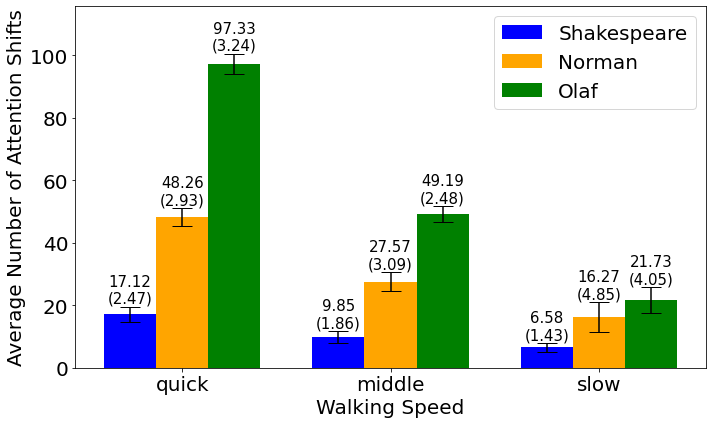

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to adjust y-limit
def adjust_ylim(ax, means, sems):
    y_max = max([mean + sem for mean, sem in zip(means, sems)])
    ax.set_ylim(0, y_max * 1.15)  # Adding a bit of margin to the top

event_levels = combined_df['event_update_level'].unique()
data_a = extract_data_for_agent(df_a, 'num_attention_switches', event_levels)
data_b = extract_data_for_agent(df_b, 'num_attention_switches', event_levels)
data_c = extract_data_for_agent(df_c, 'num_attention_switches', event_levels)

x_labels = ["quick", "middle", "slow"]
x = np.arange(len(x_labels))

def calculate_mean_and_sem(data):
    means = [np.mean(d) for d in data]
    sems = [np.std(d) / 1 for d in data]
    return means, sems

means_a, sem_a = calculate_mean_and_sem(data_a)
means_b, sem_b = calculate_mean_and_sem(data_b)
means_c, sem_c = calculate_mean_and_sem(data_c)

bar_width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['blue', 'orange', 'green']

# Add annotations on top of the bars
def annotate_bars(ax, rects, means, sems):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f"{means[i]:.2f}\n({sems[i]:.2f})", 
                   (rect.get_x() + rect.get_width() / 2., height + sems[i] + 0.14),
                   ha='center', va='bottom', fontsize=15)

rects_a = ax.bar(x - bar_width, means_a, yerr=sem_a, color=colors[0], width=bar_width, label='Shakespeare', capsize=10)
rects_b = ax.bar(x, means_b, yerr=sem_b, color=colors[1], width=bar_width, label='Norman', capsize=10)
rects_c = ax.bar(x + bar_width, means_c, yerr=sem_c, color=colors[2], width=bar_width, label='Olaf', capsize=10)

annotate_bars(ax, rects_a, means_a, sem_a)
annotate_bars(ax, rects_b, means_b, sem_b)
annotate_bars(ax, rects_c, means_c, sem_c)

# Adjust y-axis limits
all_means = means_a + means_b + means_c
all_sems = sem_a + sem_b + sem_c
adjust_ylim(ax, all_means, all_sems)

# ax.set_title("Number of Attention Switch Across Different Walking Speed", fontsize=14, fontweight='bold')
ax.set_xlabel("Walking Speed", fontsize=20)
ax.set_ylabel("Average Number of Attention Shifts", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=20)
ax.tick_params(axis='y', labelsize=20)  # Adjust the fontsize as desired for y-axis
ax.legend(fontsize=20)

plt.tight_layout()

# Save the plot to a local file
output_filename = 'numattentionshifts.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')

plt.show()

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Compute mean and SEM
# mean_value = np.mean(l)
# sem_value = np.std(l) / np.sqrt(len(l))

# print(mean_value, np.std(l), sem_value)

# # Plotting
# plt.bar(0, mean_value, color='lightblue', yerr=sem_value, capsize=10, align='center')
# plt.xticks([])
# plt.ylabel('Value')
# plt.title('Mean value with SEM error bars')
# plt.show()


## Reading Speed

In [5]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Extract unique event levels from the combined dataframe
# event_levels = combined_df['event_update_level'].unique()

# # Extract the data for each agent
# data_a = extract_data_for_agent(df_a, 'reading_speed', event_levels)
# data_b = extract_data_for_agent(df_b, 'reading_speed', event_levels)
# data_c = extract_data_for_agent(df_c, 'reading_speed', event_levels)

# # Data Preparation
# x_labels = ["quick", "middle", "slow"]
# x = np.arange(len(x_labels))

# medians_a = [np.median(data) for data in data_a]
# medians_b = [np.median(data) for data in data_b]
# medians_c = [np.median(data) for data in data_c]


# # Create figure and axes
# fig, ax = plt.subplots(figsize=(10, 6))

# # Set width for boxplots
# box_width = 0.15

# # Boxplot settings
# boxprops = dict(alpha=0.5)
# medianprops = dict(color='black')
# whiskerprops = dict(linestyle='--')

# # Shaded regions for the background event update levels
# colors = ['lightgreen', 'lightblue', 'lightgray']
# for i, color in enumerate(colors):
#     ax.axvspan(i - 0.5, i + 0.5, facecolor=color)

# # Plot boxplots for agents a, b, and c
# bp1 = ax.boxplot(data_a, positions=x - box_width, widths=box_width, patch_artist=True, boxprops=dict(facecolor='blue', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)
# bp2 = ax.boxplot(data_b, positions=x, widths=box_width, patch_artist=True, boxprops=dict(facecolor='orange', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)
# bp3 = ax.boxplot(data_c, positions=x + box_width, widths=box_width, patch_artist=True, boxprops=dict(facecolor='green', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)

# # Plot median trends
# ax.plot(x - box_width, medians_a, 'o-', color='blue', label='Agent a Median')
# ax.plot(x, medians_b, 'o-', color='orange', label='Agent b Median')
# ax.plot(x + box_width, medians_c, 'o-', color='green', label='Agent c Median')

# # Styling
# ax.set_title("Reading Speed Across Different Background Event Update Level", fontsize=14, fontweight='bold')
# ax.set_xlabel("Background Event Update Levels", fontsize=12)
# ax.set_ylabel("Reading Speed", fontsize=12)
# ax.set_xticks(x)
# ax.set_xticklabels(x_labels)
# ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp1["medians"][0], bp2["medians"][0], bp3["medians"][0]], ['Agent a', 'Agent b', 'Agent c', 'Agent a Median', 'Agent b Median', 'Agent c Median'])

# # Adjust the layout
# plt.tight_layout()

# plt.show()

Plot saved as readingspeed.png


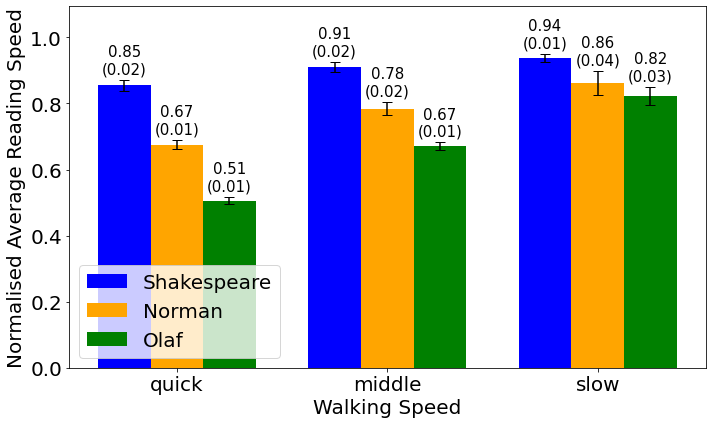

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the combined_df and extract_data_for_agent() function is already defined

event_levels = combined_df['event_update_level'].unique()
data_a = extract_data_for_agent(df_a, 'reading_speed', event_levels)
data_b = extract_data_for_agent(df_b, 'reading_speed', event_levels)
data_c = extract_data_for_agent(df_c, 'reading_speed', event_levels)

x_labels = ["quick", "middle", "slow"]
x = np.arange(len(x_labels))

def calculate_mean_and_sem(data):
    means = [np.mean(d) for d in data]
    sems = [np.std(d) / 1 for d in data]
    return means, sems

# Function to adjust y-limit
def adjust_ylim(ax, means, sems):
    y_max = max([mean + sem for mean, sem in zip(means, sems)])
    ax.set_ylim(0, y_max * 1.15)  # Adding a bit of margin to the top

means_a, sem_a = calculate_mean_and_sem(data_a)
means_b, sem_b = calculate_mean_and_sem(data_b)
means_c, sem_c = calculate_mean_and_sem(data_c)

bar_width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['blue', 'orange', 'green']

# Add annotations on top of the bars
def annotate_bars(ax, rects, means, sems):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f"{means[i]:.2f}\n({sems[i]:.2f})", 
                   (rect.get_x() + rect.get_width() / 2., height + sems[i] + 0.01),
                   ha='center', va='bottom', fontsize=15)

rects_a = ax.bar(x - bar_width, means_a, yerr=sem_a, color=colors[0], width=bar_width, label='Shakespeare', capsize=5)
rects_b = ax.bar(x, means_b, yerr=sem_b, color=colors[1], width=bar_width, label='Norman', capsize=5)
rects_c = ax.bar(x + bar_width, means_c, yerr=sem_c, color=colors[2], width=bar_width, label='Olaf', capsize=5)

annotate_bars(ax, rects_a, means_a, sem_a)
annotate_bars(ax, rects_b, means_b, sem_b)
annotate_bars(ax, rects_c, means_c, sem_c)

# Adjust y-axis limits
all_means = means_a + means_b + means_c
all_sems = sem_a + sem_b + sem_c
adjust_ylim(ax, all_means, all_sems)

ax.set_xlabel("Walking Speed", fontsize=20)
ax.set_ylabel("Normalised Average Reading Speed", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=20)
ax.tick_params(axis='y', labelsize=20)  # Adjust the fontsize as desired for y-axis
ax.legend(fontsize=20)

plt.tight_layout()

# Save the plot to a local file
output_filename = 'readingspeed.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')

plt.show()

In [7]:
means_a, sem_a

([0.8541923333333333, 0.9106146666666668, 0.9384326666666667],
 [0.018050195970004183, 0.015192249720023528, 0.01244643722338067])

## Walking Performance

In [9]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Data Preparation
# x_labels = ["quick", "middle", "slow"]
# x = np.arange(len(x_labels))

# # Data for agents a, b, and c
# data_a = [[0.55, 4.95, 0], [0, 0, 0.94], [0, 0, 0]]
# data_b = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
# data_c = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

# # Means and standard deviations for agents a, b, and c
# means_a = [np.mean(data) for data in data_a]
# means_b = [np.mean(data) for data in data_b]
# means_c = [np.mean(data) for data in data_c]

# std_a = [np.std(data) for data in data_a]
# std_b = [np.std(data) for data in data_b]
# std_c = [np.std(data) for data in data_c]

# # Create figure and axes
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot bars for agents a, b, and c with error bars
# width = 0.2
# bars_a = ax.bar(x - width, means_a, width, yerr=std_a, color='blue', alpha=0.6, capsize=5)
# bars_b = ax.bar(x, means_b, width, yerr=std_b, color='orange', alpha=0.6, capsize=5)
# bars_c = ax.bar(x + width, means_c, width, yerr=std_c, color='green', alpha=0.6, capsize=5)

# # Add annotations
# def annotate_bars(bars, label, shift):
#     for bar in bars:
#         yval = bar.get_height()
#         ax.annotate(label,
#                     xy=(bar.get_x() + bar.get_width() / 2, yval),
#                     xytext=(shift, 3),  # Adjusted shift parameter for side shift
#                     textcoords="offset points",
#                     ha='center', va='bottom',
#                     fontsize=9, color='black', fontweight='bold')

# annotate_bars(bars_a, 'a', -5)
# annotate_bars(bars_b, 'b', 0)  # Central annotation
# annotate_bars(bars_c, 'c', 5)

# # Styling
# ax.set_title("Information Loss Across Different Background Event Update Levels", fontsize=14, fontweight='bold')
# ax.set_xlabel("Background Event Update Levels", fontsize=12)
# ax.set_ylabel("Information Loss", fontsize=12)
# ax.set_xticks(x)
# ax.set_xticklabels(x_labels)
# ax.legend(["Agent a", "Agent b", "Agent c"])
# ax.set_ylim([-0.5, 6])  # Adjusting y limits to better visualize the data

# # Adjust the layout
# plt.tight_layout()

# plt.show()


Plot saved as walkingperformance.png


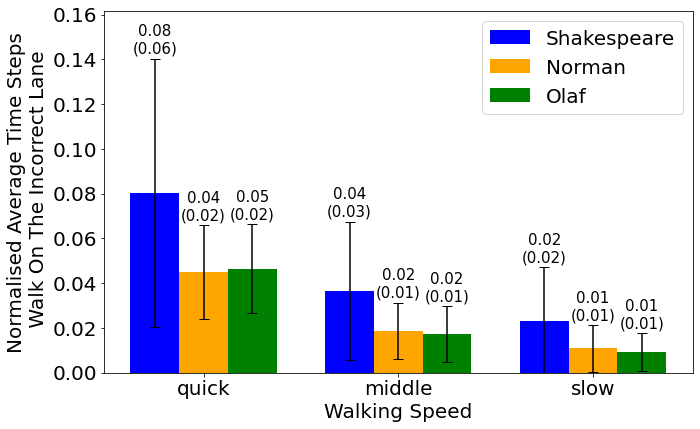

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the combined_df and extract_data_for_agent() function is already defined
event_levels = combined_df['event_update_level'].unique()
data_a = extract_data_for_agent(df_a, 'inform_loss', event_levels)
data_b = extract_data_for_agent(df_b, 'inform_loss', event_levels)
data_c = extract_data_for_agent(df_c, 'inform_loss', event_levels)

x_labels = ["quick", "middle", "slow"]
x = np.arange(len(x_labels))

# Adjusted to calculate STD
def calculate_normalized_mean_and_std(data, total_steps):
    means = [np.mean(d) / total_steps for d in data]
    stds = [np.std(d) / total_steps for d in data]
    return means, stds

# Extract total steps for each dataframe
total_steps_a = df_a['total_steps'].iloc[0]
total_steps_b = df_b['total_steps'].iloc[0]
total_steps_c = df_c['total_steps'].iloc[0]

means_a, std_a = calculate_normalized_mean_and_std(data_a, total_steps_a)
means_b, std_b = calculate_normalized_mean_and_std(data_b, total_steps_b)
means_c, std_c = calculate_normalized_mean_and_std(data_c, total_steps_c)

# Adjust y-limit function
def adjust_ylim(ax, means, stds):
    y_max = max([mean + std for mean, std in zip(means, stds)])
    ax.set_ylim(0, y_max * 1.15)

bar_width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['blue', 'orange', 'green']

# Annotate bars with means and STD values
def annotate_bars(ax, rects, means, stds):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f"{means[i]:.2f}\n({stds[i]:.2f})", 
                   (rect.get_x() + rect.get_width() / 2., height + stds[i] + 0.001),
                   ha='center', va='bottom', fontsize=15)

rects_a = ax.bar(x - bar_width, means_a, yerr=std_a, color=colors[0], width=bar_width, label='Shakespeare', capsize=5)
rects_b = ax.bar(x, means_b, yerr=std_b, color=colors[1], width=bar_width, label='Norman', capsize=5)
rects_c = ax.bar(x + bar_width, means_c, yerr=std_c, color=colors[2], width=bar_width, label='Olaf', capsize=5)

annotate_bars(ax, rects_a, means_a, std_a)
annotate_bars(ax, rects_b, means_b, std_b)
annotate_bars(ax, rects_c, means_c, std_c)

# Adjust y-axis limits
all_means = means_a + means_b + means_c
all_stds = std_a + std_b + std_c
adjust_ylim(ax, all_means, all_stds)

# ax.set_title("Inform Loss Across Different Background Event Update Levels", fontsize=14, fontweight='bold')
ax.set_xlabel("Walking Speed", fontsize=20)
ax.set_ylabel("Normalised Average Time Steps\n Walk On The Incorrect Lane", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=20)
ax.tick_params(axis='y', labelsize=20)  # Adjust the fontsize as desired for y-axis

ax.legend(fontsize=20)

plt.tight_layout()

# Save the plot to a local file
output_filename = 'walkingperformance.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')
plt.show()

## Attention Switch Moment Margin vs Middle

In [11]:
# import matplotlib.pyplot as plt

# # Agent A Data
# total_attention_a = sum([13, 11.35, 11.45, 6.41, 6.41, 5.47, 4.04, 3.52, 3.52])
# margin_attention_a = sum([9.55, 5.7, 5.9, 3.88, 3.88, 2.94, 3.08, 2.04, 2.04])
# middle_attention_a = total_attention_a - margin_attention_a

# # Agent B Data
# total_attention_b = sum([24, 18, 18, 10, 9.47, 9.53, 6, 5.25, 6])
# margin_attention_b = sum([24, 12, 10, 5, 3.41, 4.53, 6, 5.52, 4.96])
# middle_attention_b = total_attention_b - margin_attention_b

# # Agent C Data
# total_attention_c = sum([26.16, 24, 26.16, 17.14, 12.47, 11.53, 10, 10.52, 8.08])
# margin_attention_c = sum([26.16, 24, 26.16, 12.22, 8.47, 7.94, 7, 7.53, 7.04])
# middle_attention_c = total_attention_c - margin_attention_c

# # Calculating percentages
# margin_percentage_a = (margin_attention_a / total_attention_a) * 100
# middle_percentage_a = (middle_attention_a / total_attention_a) * 100

# margin_percentage_b = (margin_attention_b / total_attention_b) * 100
# middle_percentage_b = (middle_attention_b / total_attention_b) * 100

# margin_percentage_c = (margin_attention_c / total_attention_c) * 100
# middle_percentage_c = (middle_attention_c / total_attention_c) * 100

# labels = ['Agent A', 'Agent B', 'Agent C']
# total_attentions = [total_attention_a, total_attention_b, total_attention_c]
# margin_attentions = [margin_attention_a, margin_attention_b, margin_attention_c]
# middle_attentions = [middle_attention_a, middle_attention_b, middle_attention_c]

# margin_percentages = [margin_percentage_a, margin_percentage_b, margin_percentage_c]
# middle_percentages = [middle_percentage_a, middle_percentage_b, middle_percentage_c]

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))
# bars_margin = ax.bar(labels, margin_attentions, label='Beging/End of a sentence', color='blue')
# bars_middle = ax.bar(labels, middle_attentions, bottom=margin_attentions, label='Middle of a sentence', color='orange')

# # Annotating with percentages
# for i, bar in enumerate(bars_margin):
#     height = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2., height/2., 
#             f'{margin_percentages[i]:.1f}%', ha='center', va='center', color='white', fontsize=10)
    
# for i, bar in enumerate(bars_middle):
#     height = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2., margin_attentions[i] + height/2., 
#             f'{middle_percentages[i]:.1f}%', ha='center', va='center', color='white', fontsize=10)

# ax.set_ylabel('Number of Attention Switches')
# ax.set_title('Attention Switch Interruption Position Distribution by Sentence Position')
# ax.legend(loc='upper left')

# plt.show()


Plot saved as readinginterruptionpoints.png


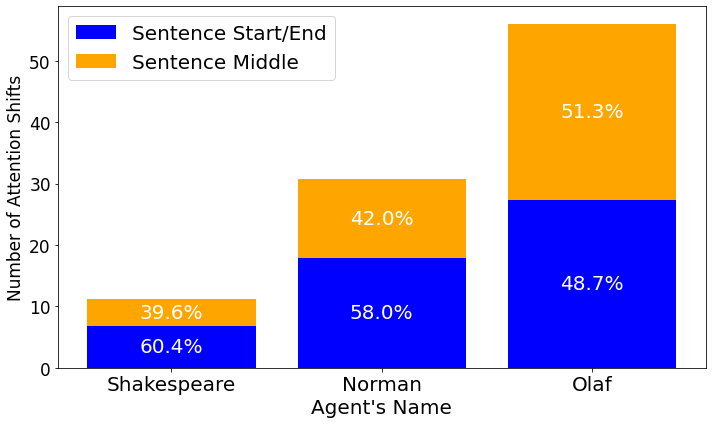

In [16]:
import matplotlib.pyplot as plt

def extract_average_attention_data(df):
    avg_total_attention = df['num_attention_switches'].mean()
    avg_margin_attention = df['num_attention_switches_margins'].mean()
    avg_middle_attention = df['num_attention_switches_middle'].mean()
    
    margin_percentage = (avg_margin_attention / avg_total_attention) * 100
    middle_percentage = (avg_middle_attention / avg_total_attention) * 100
    
    return avg_total_attention, avg_margin_attention, avg_middle_attention, margin_percentage, middle_percentage

# Extracting data from dataframes
avg_total_attention_a, avg_margin_attention_a, avg_middle_attention_a, margin_percentage_a, middle_percentage_a = extract_average_attention_data(df_a)
avg_total_attention_b, avg_margin_attention_b, avg_middle_attention_b, margin_percentage_b, middle_percentage_b = extract_average_attention_data(df_b)
avg_total_attention_c, avg_margin_attention_c, avg_middle_attention_c, margin_percentage_c, middle_percentage_c = extract_average_attention_data(df_c)

labels = ['Shakespeare', 'Norman', 'Olaf']
avg_total_attentions = [avg_total_attention_a, avg_total_attention_b, avg_total_attention_c]
avg_margin_attentions = [avg_margin_attention_a, avg_margin_attention_b, avg_margin_attention_c]
avg_middle_attentions = [avg_middle_attention_a, avg_middle_attention_b, avg_middle_attention_c]

margin_percentages = [margin_percentage_a, margin_percentage_b, margin_percentage_c]
middle_percentages = [middle_percentage_a, middle_percentage_b, middle_percentage_c]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars_margin = ax.bar(labels, avg_margin_attentions, label='Sentence Start/End', color='blue')
bars_middle = ax.bar(labels, avg_middle_attentions, bottom=avg_margin_attentions, label='Sentence Middle', color='orange')

# Annotating with percentages
for i, bar in enumerate(bars_margin):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2., 
            f'{margin_percentages[i]:.1f}%', ha='center', va='center', color='white', fontsize=20)
    
for i, bar in enumerate(bars_middle):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., avg_margin_attentions[i] + height/2., 
            f'{middle_percentages[i]:.1f}%', ha='center', va='center', color='white', fontsize=20)

ax.set_xlabel("Agent's Name", fontsize=20)
ax.set_ylabel('Number of Attention Shifts', fontsize=17)
# ax.set_title('Average Attention Switch Interruption Position Distribution by Sentence Position')
ax.set_xticks(np.arange(len(labels)))  # Set tick locations
ax.set_xticklabels(labels, fontsize=20)  # Adjust fontsize as desired
ax.tick_params(axis='y', labelsize=17)  # Adjust the fontsize as desired for y-axis
ax.legend(loc='upper left', fontsize=20)

plt.tight_layout()

# Save the plot to a local file
output_filename = 'readinginterruptionpoints.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')
plt.show()


## Trajectory

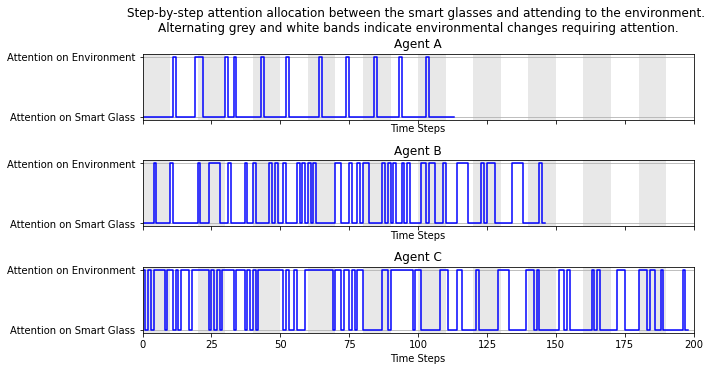

In [13]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import ast

# # 1. Reading the CSV files

# # Convert attention_switches_time_steps_list from string to list
# for df in [df_a, df_b, df_c]:
#     df['attention_switches_time_steps_list'] = df['attention_switches_time_steps_list'].apply(lambda x: ast.literal_eval(x))

# def plot_attention_switches(df, ax, title, event_level):
    
#     # Filter the dataframe by the given event update level and then select a row
#     filtered_df = df[df['event_update_level'] == event_level]
#     if filtered_df.empty:
#         print(f"No data found for {title} with event_update_level: {event_level}")
#         return
    
#     # Randomly select one instance/row
#     selected_instance = filtered_df['attention_switches_time_steps_list'].sample().iloc[0]
#     max_episode_length = 200
    
#     # Create colored regions for every update interval
#     colors = ['lightgray', 'white']  # two colors to alternate between
#     if event_level == 'short':
#         interval = 10
#         for i in range(0, max_episode_length, interval):
#             ax.axvspan(i, i+interval, facecolor=colors[i // interval % 2], alpha=0.5)
    
#     # Ensure that the plotting stops at the "total_steps" point for the selected instance
#     total_steps = df.loc[df['attention_switches_time_steps_list'].apply(lambda x: x == selected_instance), 'total_steps'].values[0]
    
#     time_steps = list(range(max_episode_length))
#     activity = [1 if step in selected_instance else 0 for step in time_steps]
    
#     # Make sure the plot stops at the ending point
#     for i in range(total_steps, max_episode_length):
#         activity[i] = float('nan')
    
#     ax.step(time_steps, activity, where='post', label='Activity', color='blue')
#     ax.set_xlim(0, max_episode_length)
#     ax.set_yticks([0, 1])
#     ax.set_yticklabels(['Attention on Smart Glass', 'Attention on Environment'])
#     ax.set_xlabel('Time Steps')
#     ax.set_title(title)
#     ax.grid(axis='y')

# fig, axes = plt.subplots(3, 1, figsize=(10, 5.4), sharex=True)

# event_level = 'short'
# plot_attention_switches(df_a, axes[0], 'Agent A', event_level)
# plot_attention_switches(df_b, axes[1], 'Agent B', event_level)
# plot_attention_switches(df_c, axes[2], 'Agent C', event_level)

# # Instead of suptitle, set a title using ax.text() for more control
# axes[0].text(0.5, 1.5, 'Step-by-step attention allocation between the smart glasses and attending to the environment. \nAlternating grey and white bands indicate environmental changes requiring attention.', 
#             ha='center', va='center', transform=axes[0].transAxes, fontsize=12)

# # plt.figtext(0.1, 0.01, "Note: Alternating grey and white bands indicate environmental changes requiring attention.", ha="left", fontsize=10)

# plt.tight_layout()
# plt.show()

In [14]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import ast

# # 1. Reading the CSV files
# df_a = pd.read_csv(agent_a)
# df_b = pd.read_csv(agent_b)
# df_c = pd.read_csv(agent_c)

# # Convert attention_switches_time_steps_list from string to list
# for df in [df_a, df_b, df_c]:
#     df['attention_switches_time_steps_list'] = df['attention_switches_time_steps_list'].apply(lambda x: ast.literal_eval(x))

# def plot_attention_switches(df, ax, title, event_level):
    
#     # Filter the dataframe by the given event update level and then select a row
#     filtered_df = df[df['event_update_level'] == event_level]
#     if filtered_df.empty:
#         print(f"No data found for {title} with event_update_level: {event_level}")
#         return
    
#     # Randomly select one instance/row
#     selected_instance = filtered_df['attention_switches_time_steps_list'].sample().iloc[0]
#     max_episode_length = 200
    
#     # Create colored regions for every update interval
#     colors = ['lightgray', 'white']  # two colors to alternate between
#     if event_level == 'short':
#         interval = 10
#         for i in range(0, max_episode_length, interval):
#             ax.axvspan(i, i+interval, facecolor=colors[i // interval % 2], alpha=0.5)
    
#     # Ensure that the plotting stops at the "total_steps" point for the selected instance
#     total_steps = df.loc[df['attention_switches_time_steps_list'].apply(lambda x: x == selected_instance), 'total_steps'].values[0]
    
#     time_steps = list(range(max_episode_length))
    
#     # Adjust y-values for plotting
#     env_position = 0.65
#     smart_glass_position = 1 - env_position
    
#     rectangle_height = 0.15  # height of the rectangle
#     rectangle_width = 1  # width of the rectangle (1 time step)
    
#     scatter_y = [env_position if step in selected_instance else smart_glass_position for step in time_steps[:total_steps]]
    
#     # Plot rectangles for every time step
#     for index, step in enumerate(time_steps[:total_steps]):
#         position_y = scatter_y[index] - (rectangle_height / 2)  # subtract half the rectangle's height to center it on the y-value
#         color = 'blue' if scatter_y[index] == env_position else 'red'
#         rect = patches.Rectangle((step, position_y), rectangle_width, rectangle_height, linewidth=1, edgecolor=color, facecolor=color)
#         ax.add_patch(rect)
    
#     ax.set_xlim(0, max_episode_length)
#     ax.set_yticks([smart_glass_position, env_position])
#     ax.set_yticklabels(['Attention on \nSmart Glass', 'Attention on \nEnvironment'])
#     ax.set_ylim(0.15, 0.85)  # Adjust the y-axis limits to zoom in around the region of interest
#     ax.set_xlabel('Time Steps')
#     ax.set_title(title)
#     ax.grid(axis='y')

# fig, axes = plt.subplots(3, 1, figsize=(10, 5.4), sharex=True)

# event_level = 'short'
# plot_attention_switches(df_a, axes[0], 'Agent A', event_level)
# plot_attention_switches(df_b, axes[1], 'Agent B', event_level)
# plot_attention_switches(df_c, axes[2], 'Agent C', event_level)

# # Instead of suptitle, set a title using ax.text() for more control
# axes[0].text(0.5, 1.75, 'Step-by-step attention allocation between the smart glasses and attending to the environment. \nAlternating grey and white bands indicate environmental changes requiring attention.', 
#             ha='center', va='center', transform=axes[0].transAxes, fontsize=12)

# plt.tight_layout()
# plt.show()

Plot saved as attentionswitchestrajectory.png


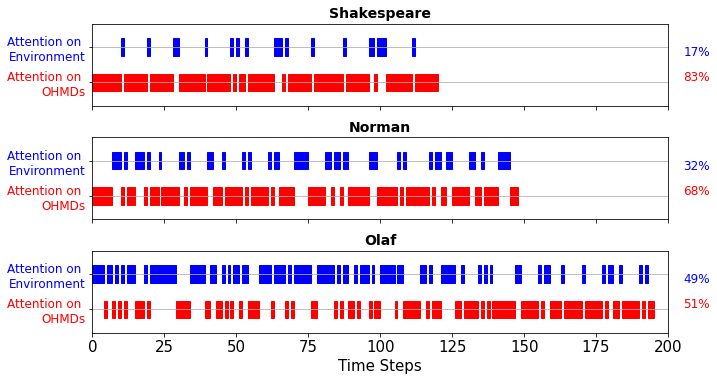

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

# 1. Reading the CSV files
df_a = pd.read_csv(agent_a)
df_b = pd.read_csv(agent_b)
df_c = pd.read_csv(agent_c)

# Convert attention_switches_time_steps_list from string to list
for df in [df_a, df_b, df_c]:
    df['attention_switches_time_steps_list'] = df['attention_switches_time_steps_list'].apply(lambda x: ast.literal_eval(x))

def plot_attention_switches(df, ax, title, event_level):
    
    # Filter the dataframe by the given event update level and then select a row
    filtered_df = df[df['event_update_level'] == event_level]
    if filtered_df.empty:
        print(f"No data found for {title} with event_update_level: {event_level}")
        return
    
    # Randomly select one instance/row
    selected_instance = filtered_df['attention_switches_time_steps_list'].sample().iloc[0]
    max_episode_length = 200
    
#     # Create colored regions for every update interval
#     colors = ['lightgray', 'white']  # two colors to alternate between
#     if event_level == 'short':
#         interval = 10
#         for i in range(0, max_episode_length, interval):
#             ax.axvspan(i, i+interval, facecolor=colors[i // interval % 2], alpha=0.5)
    
    # Ensure that the plotting stops at the "total_steps" point for the selected instance
    total_steps = df.loc[df['attention_switches_time_steps_list'].apply(lambda x: x == selected_instance), 'total_steps'].values[0]
    
    time_steps = list(range(max_episode_length))
    
    # Adjust y-values for plotting
    env_position = 0.65
    smart_glass_position = 1 - env_position
    
    rectangle_height = 0.15  # height of the rectangle
    rectangle_width = 1  # width of the rectangle (1 time step)
    
    scatter_y = [env_position if step in selected_instance else smart_glass_position for step in time_steps[:total_steps]]
    
    # Plot rectangles for every time step
    for index, step in enumerate(time_steps[:total_steps]):
        position_y = scatter_y[index] - (rectangle_height / 2)  # subtract half the rectangle's height to center it on the y-value
        color = 'blue' if scatter_y[index] == env_position else 'red'
        rect = patches.Rectangle((step, position_y), rectangle_width, rectangle_height, linewidth=1, edgecolor=color, facecolor=color)
        ax.add_patch(rect)
    
    # Adjust x-axis limits to make space for annotations on the right
    annotation_space = 25
    ax.set_xlim(0, max_episode_length + annotation_space)
    
    # Calculate percentages for attention distribution
    env_percentage = round((scatter_y.count(env_position) / total_steps) * 100)
    smart_glass_percentage = round((scatter_y.count(smart_glass_position) / total_steps) * 100)
    
    # Add text outside the plotting box (1.05 is just slightly outside the box on the right)
    ax.text(1.05, env_position, f'{env_percentage}%', fontsize=12, ha='center', va='center', transform=ax.transAxes, color='blue')
    ax.text(1.05, smart_glass_position, f'{smart_glass_percentage}%', fontsize=12, ha='center', va='center', transform=ax.transAxes, color='red')
    
#     # Add annotations to the expanded area on the right
#     ax.annotate(f'{env_percentage}%', (max_episode_length + 10, env_position), fontsize=12, ha='center', color='blue')
#     ax.annotate(f'{smart_glass_percentage}%', (max_episode_length + 10, smart_glass_position), fontsize=12, ha='center', color='red')
    
    ax.set_xlim(0, max_episode_length)
    ax.set_yticks([smart_glass_position, env_position])
    ax.set_yticklabels(['Attention on \nOHMDs', 'Attention on \nEnvironment'])
    ax.set_ylim(0.15, 0.85)  # Adjust the y-axis limits to zoom in around the region of interest
#     ax.set_xlabel('Time Steps')
    # Change the color of y-axis labels
    ylabels = ax.get_yticklabels()
    ylabels[0].set_color('red')
    ylabels[1].set_color('blue')
    ax.set_title(title)
    ax.grid(axis='y')

fig, axes = plt.subplots(3, 1, figsize=(10, 5.4), sharex=True)

fig.subplots_adjust(right=0.8)  # Adjust this value if the annotations overlap with the plots

event_level = 'short'
plot_attention_switches(df_a, axes[0], 'Shakespeare', event_level)
plot_attention_switches(df_b, axes[1], 'Norman', event_level)
plot_attention_switches(df_c, axes[2], 'Olaf', event_level)

# Change the size of y-axis tick labels
for ax in axes:
    ax.yaxis.set_tick_params(labelsize=12)  # Adjust the font size as needed
    
    # Make the plot title (name) bold
    ax.set_title(ax.get_title(), weight='bold', fontsize=14)
    
#     yticklabels = ax.get_yticklabels()
#     for label in yticklabels:
#         if label.get_text() in ['shakespeare', 'Norman', 'Olaf']:
#             label.set_weight('bold')  # Make specific names bold

# Add x-axis label only to the last subplot
axes[2].set_xlabel('Time Steps', fontsize=15)
ax.tick_params(axis='x', labelsize=15)  # Adjust the fontsize as desired for y-axis

# # Instead of suptitle, set a title using ax.text() for more control
# axes[0].text(0.5, 1.75, 'Step-by-step attention allocation between the smart glasses and attending to the environment. \nAlternating grey and white bands indicate environmental changes requiring attention.', 
#             ha='center', va='center', transform=axes[0].transAxes, fontsize=12)

plt.tight_layout()
# Save the plot to a local file
output_filename = 'attentionswitchestrajectory.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')

plt.show()